In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt 


def reset_graph():
    tf.reset_default_graph()
    tf.set_random_seed(34)
    np.random.seed(43)

In [2]:
reset_graph()

In [3]:
from sklearn.datasets import make_moons

m=1000
x,y=make_moons(m,noise=0.1,random_state=42)

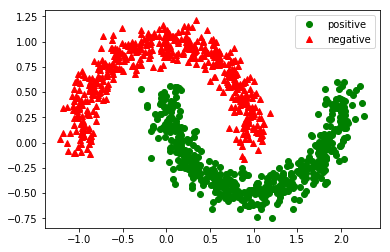

In [4]:
plt.plot(x[y==1,0],x[y==1,1],"go",label="positive")
plt.plot(x[y==0,0],x[y==0,1],"r^",label="negative")
plt.legend()


In [5]:
y=y.reshape(-1,1)
y.shape

(1000, 1)

In [6]:
test_ratio=0.2
test_size=int(m*test_ratio)
x_train=x[test_size:]
y_train=y[test_size:]
x_test=x[:test_size]
y_test=y[:test_size]

In [7]:
def random_batch(x_train,y_train,batch_size):
    rnd_indices=np.random.randint(0,len(x_train),batch_size)
    x_batch=x_train[rnd_indices]
    y_batch=y_train[rnd_indices]
    return x_batch,y_batch

In [8]:
reset_graph()

In [9]:
n_inputs=2
x=tf.placeholder(tf.float32,shape=[None,2],name="x")
y=tf.placeholder(tf.float32,shape=[None,1],name="y")

w=tf.Variable(tf.random_normal([n_inputs,1],0,1),name="w")
b=tf.Variable(tf.random_normal([1],0,1),name="bias")

logits=tf.add(tf.matmul(x,w),b,name="logits")
y_proba=tf.sigmoid(logits,name="proba")



In [10]:
y_proba.shape

TensorShape([Dimension(None), Dimension(1)])

In [11]:
loss=tf.losses.sigmoid_cross_entropy(multi_class_labels=y,logits=logits)

In [12]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)


In [13]:
init=tf.global_variables_initializer()

In [14]:
n_epoch=1000
batch_size=32
n_batches=int(np.ceil(m/batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoch):
        for batch_index in range(n_batches):
            x_batch,y_batch=random_batch(x_train,y_train,batch_size=batch_size)
            sess.run(training_op,feed_dict={x:x_batch,y:y_batch})
        loss_val = loss.eval({x: x_test, y: y_test})
        if epoch%100==0:
            print(loss_val)
    y_proba_val=y_proba.eval(feed_dict={x:x_test,y:y_test})
    

0.804836
0.3084131
0.27499196
0.26210967
0.25587934
0.25267157
0.24993181
0.24931957
0.24871935
0.24768072


In [15]:
y_pred=y_proba_val>=0.5
y_pred[:5]

array([[False],
       [ True],
       [ True],
       [ True],
       [False]])

In [16]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred)

0.8979591836734694

In [17]:
x_test[y_pred[1,0],1]

array([[ 1.03201691, -0.41974116]])

<function matplotlib.pyplot.show(*args, **kw)>

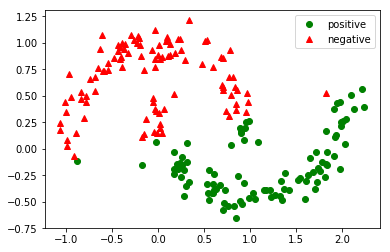

In [18]:
plt.plot(x_test[y_pred[:,0],0],x_test[y_pred[:,0],1],"go",label="positive")
plt.plot(x_test[~y_pred[:,0],0],x_test[~y_pred[:,0],1],"r^",label="negative")
plt.legend()
plt.show

### Add Features

In [19]:
x_train_enc=np.c_[x_train,np.square(x_train[:,0]),np.square(x_train[:,1])]
x_test_enc=np.c_[x_test,np.square(x_test[:,0]),np.square(x_test[:,1])]
x_train.shape

(800, 2)

In [20]:
reset_graph()

In [21]:
n_inputs=4
x=tf.placeholder(tf.float32,shape=[None,4],name="x")
y=tf.placeholder(tf.float32,shape=[None,1],name="y")

w=tf.Variable(tf.random_normal([n_inputs,1],0,1),name="w")
b=tf.Variable(1.,name="bias")

logits=tf.add(tf.matmul(x,w),b,name="logits")
y_proba=tf.sigmoid(logits,name="proba")


In [22]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [23]:
loss=tf.losses.sigmoid_cross_entropy(multi_class_labels=y,logits=logits)
training_op=tf.train.GradientDescentOptimizer(0.001).minimize(loss)


In [24]:

n_batches=int(len(x_train)/32)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10000):
        
        for i in range(n_batches):
            x_batch,y_batch=random_batch(x_train_enc,y_train,32)
            sess.run(training_op,feed_dict={x:x_batch,y:y_batch})
        Loss=loss.eval(feed_dict={x:x_test_enc,y:y_test})
        if epoch%100==0:
            print(Loss)
    y_proba_val=sess.run(y_proba,feed_dict={x:x_test_enc,y:y_test})

1.326822
0.72907585
0.5075926
0.41974464
0.37829453
0.3551298
0.33998
0.3288404
0.32041818
0.31366566
0.30788216
0.3027767
0.2983434
0.29481936
0.29128298
0.2883176
0.28549415
0.28311267
0.2807968
0.27859917
0.2766203
0.27461442
0.27305704
0.2716321
0.27025115
0.26914254
0.26804906
0.26666173
0.26559773
0.26464698
0.26374683
0.26289263
0.2621106
0.26158056
0.26086387
0.25998375
0.25953567
0.25898677
0.25835896
0.25790107
0.25735718
0.25692713
0.25664032
0.25613683
0.25583184
0.25557777
0.2552375
0.2548937
0.25454938
0.25416398
0.2539486
0.25387183
0.25347325
0.253092
0.25291678
0.25268972
0.2523963
0.2522741
0.25222057
0.25197804
0.25173047
0.25149104
0.25138807
0.2512756
0.25116426
0.25097796
0.25089562
0.25056496
0.25049454
0.25039077
0.25019357
0.25022876
0.25013518
0.24996692
0.2498367
0.24965271
0.24958698
0.24974395
0.24973327
0.24952485
0.24942848
0.24918427
0.24914226
0.24911088
0.24896915
0.24906777
0.24891412
0.2487838
0.24866232
0.24893852
0.24903183
0.24896745
0.24891853
0.

In [25]:
y_pred=y_proba_val>=0.5

In [26]:
precision_score(y_test,y_pred)

0.88

overfit !!!

In [27]:
reset_graph()

In [28]:
n_inputs

4

In [29]:
def logistic_regression(x,y,initializer=None,seed=42,learning_rate=0.01):
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            w=tf.Variable(tf.random_normal([4,1],1,0),name="w")
            bias=tf.Variable(tf.random_normal([1],1,0),name="bias")
            logits=tf.add(tf.matmul(x,w),bias,name="logits")
            print("logits",logits)
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss=tf.losses.sigmoid_cross_entropy(y,logits)
            training_op=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
            loss_summary=tf.summary.scalar("log_loss",loss)
        with tf.name_scope("init"):
            init=tf.global_variables_initializer()
        
        with tf.name_scope("save"):
            saver=tf.train.Saver()
        
    return y_proba,loss,training_op,loss_summary,init,saver
    

In [30]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir="tf_logs"
    if prefix:
        prefix+="-"
    name=prefix+"run-"+now
    return "{}/{}/".format(root_logdir,name)


In [31]:
n_inputs=4
logdir=log_dir("logreg")

x=tf.placeholder(tf.float32,shape=[None,4],name="x")
y=tf.placeholder(tf.float32,shape=[None,1],name="y")

y_proba,loss,training_op,loss_summary,init,saver=logistic_regression(x,y)

file_writer=tf.summary.FileWriter(logdir,tf.get_default_graph())

logits Tensor("logistic_regression/model/logits:0", shape=(?, 1), dtype=float32)


In [32]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"


with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            x_batch, y_batch = random_batch(x_train_enc, y_train, batch_size)
            sess.run(training_op, feed_dict={x: x_batch, y: y_batch})
        loss_val,summary_str=sess.run([loss,loss_summary], feed_dict={x: x_test_enc, y: y_test})
        
        file_writer.add_summary(summary_str,epoch)
        
        if epoch%500==0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess,checkpoint_path)
            with open(checkpoint_epoch_path,"wb") as f:
                f.write(b"%d" % (epoch + 1))
    
    saver.save(sess,final_model_path)
    y_proba_val=sess.run(y_proba,feed_dict={x:x_test_enc,y:y_test})
    

Epoch: 0 	Loss: 1.309795
Epoch: 500 	Loss: 0.26016927
